# **Segmenta√ß√£o Inteligente de Clientes com K-Means: Aplica√ß√£o Pr√°tica de Modelos Avan√ßados**

**Introdu√ß√£o**

Em um cen√°rio cada vez mais competitivo, compreender o perfil e o comportamento dos clientes √© fundamental para direcionar estrat√©gias de neg√≥cio de forma assertiva. A capacidade de agrupar consumidores com caracter√≠sticas semelhantes permite personalizar ofertas, otimizar campanhas de marketing e aumentar a fideliza√ß√£o.  

Neste projeto, ser√° aplicado um processo completo de ci√™ncia de dados para segmentar clientes com base em seus atributos, utilizando t√©cnicas de an√°lise explorat√≥ria, tratamento de dados e modelagem n√£o supervisionada. 

O foco ser√° o algoritmo K-Means, amplamente reconhecido por sua efici√™ncia na identifica√ß√£o de padr√µes e na cria√ß√£o de agrupamentos coesos.

**Objetivo do Projeto**

O objetivo deste projeto √© aplicar t√©cnicas avan√ßadas de ci√™ncia de dados para realizar a segmenta√ß√£o de clientes por meio do algoritmo de clustering K-Means.

O trabalho abrange desde a explora√ß√£o e pr√©-processamento dos dados at√© a implementa√ß√£o e avalia√ß√£o do modelo, consolidando conhecimentos adquiridos em an√°lise explorat√≥ria, transforma√ß√£o de vari√°veis e modelagem n√£o supervisionada.

O resultado esperado √© identificar grupos com caracter√≠sticas semelhantes, permitindo insights valiosos para estrat√©gias de marketing, personaliza√ß√£o de ofertas e melhoria da experi√™ncia do cliente.

**Justificativa**

A segmenta√ß√£o de clientes √© uma ferramenta essencial para empresas que desejam compreender melhor seu p√∫blico e direcionar suas a√ß√µes de forma mais eficaz.

Neste projeto, optou-se pelo uso do K-Means por ser um dos algoritmos mais difundidos e eficientes para problemas de clusteriza√ß√£o, especialmente quando se busca identificar padr√µes em grandes volumes de dados.

Al√©m de ter relev√¢ncia pr√°tica no mercado, este estudo permite o exerc√≠cio integrado de diversas etapas do fluxo de trabalho em ci√™ncia de dados, desde a prepara√ß√£o do dataset at√© a interpreta√ß√£o dos resultados, refor√ßando a capacidade de transformar dados brutos em conhecimento acion√°vel.

**Explora√ß√£o de Dados**

A primeira etapa do projeto consiste na an√°lise explorat√≥ria do conjunto de dados.

O objetivo √© compreender a natureza das vari√°veis, identificar tend√™ncias, distribui√ß√µes e poss√≠veis rela√ß√µes entre atributos.  
Durante essa fase, s√£o utilizadas estat√≠sticas descritivas e visualiza√ß√µes gr√°ficas para detectar padr√µes e outliers, al√©m de verificar a presen√ßa de dados ausentes ou inconsistentes que possam afetar a qualidade da an√°lise

**Tratamento de Dados**

Com base nos resultados da explora√ß√£o, √© realizada a prepara√ß√£o dos dados para a modelagem.

Essa etapa inclui a limpeza de valores ausentes ou inconsistentes, a normaliza√ß√£o ou padroniza√ß√£o das vari√°veis num√©ricas e, quando necess√°rio, a cria√ß√£o de vari√°veis derivadas para melhor representar a informa√ß√£o.  

Todas as decis√µes de pr√©-processamento s√£o documentadas, considerando seu impacto na qualidade do modelo e na interpretabilidade dos resultados.

**Implementa√ß√£o do Algoritmo K-Means:**

Ap√≥s o pr√©-processamento, o algoritmo K-Means √© aplicado ao conjunto de dados tratado.  

O n√∫mero de clusters (k) √© definido com base em m√©todos como o Elbow Method ou o Silhouette Score, buscando um equil√≠brio entre simplicidade e capacidade de representar a estrutura dos dados.

O processo de modelagem inclui ajustes de par√¢metros, execu√ß√£o do algoritmo e avalia√ß√£o da coer√™ncia dos agrupamentos obtidos.

Por fim, os resultados s√£o interpretados e discutidos, destacando as caracter√≠sticas que diferenciam cada grupo identificado.

**O dataset a ser utilizado neste projeto cont√©m informa√ß√µes de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador √∫nico atribu√≠do a cada cliente.

Gender: G√™nero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de d√≥lares.

Spending Score (1-100): Pontua√ß√£o atribu√≠da pelo shopping com base no
comportamento e padr√£o de gastos do cliente.

# Explora√ß√£o dos Dados

In [1]:
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv', sep=',')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Verificando a distribui√ß√£o geral das vari√°veis.

In [5]:
fig = px.box(df, y=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], title="Distribui√ß√£o das Vari√°veis")
fig.show()


Visualizando quais s√£o os clientes que est√£o com Income acima do Q3.

In [6]:
print(df.loc[df['Annual Income (k$)'] >= 137])

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


Identificamos dois clientes com **Annual Income = 137**, ambos na mesma faixa et√°ria (30-32 anos).  
Embora esses valores estejam acima do terceiro quartil (**Q3 = 126**), **n√£o podem ser considerados outliers estat√≠sticos**, pois est√£o dentro da distribui√ß√£o esperada do dataset.  

Apesar da similaridade na renda, os clientes apresentam padr√µes de consumo distintos:  
- **Cliente 199:** Baixo Spending Score (18) ‚Üí Perfil mais conservador, com tend√™ncia a menor consumo.  
- **Cliente 200:** Alto Spending Score (83) ‚Üí Gastos mais ativos, possivelmente um consumidor premium.  

Essa segmenta√ß√£o pode ser √∫til para estrat√©gias de marketing, possibilitando a personaliza√ß√£o de ofertas.  
Clientes com menor √≠ndice de gastos podem ser incentivados por meio de descontos exclusivos, enquanto consumidores mais ativos podem ser beneficiados com programas de fidelidade e experi√™ncias premium.  

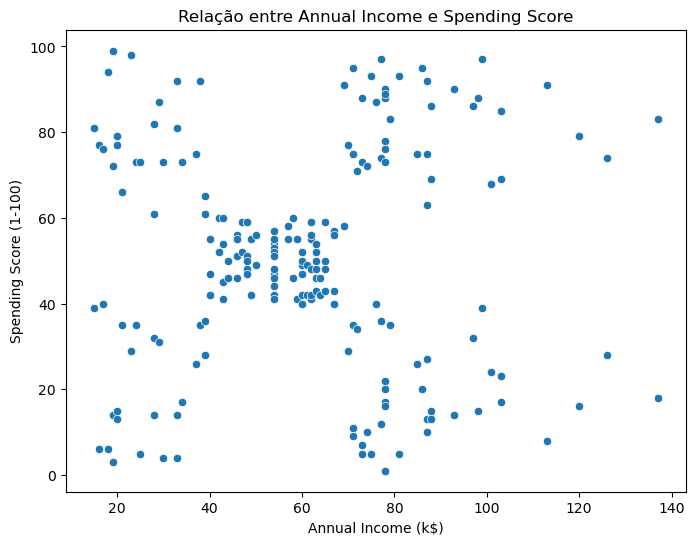

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.title("Rela√ß√£o entre Annual Income e Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


A an√°lise do gr√°fico de dispers√£o indica que **n√£o h√° uma rela√ß√£o linear clara** entre renda anual (**Annual Income**) e padr√£o de gastos (**Spending Score**). A distribui√ß√£o dos pontos sugere que clientes com diferentes faixas de renda apresentam h√°bitos de consumo variados, sem um padr√£o previs√≠vel.  

Podemos identificar de quatro a cinco grupos distintos:
- Clientes com **Baixa renda, baixo Spending Score** ‚Üí Clientes econ√¥micos que gastam pouco.
- Clientes com **Baixa renda, alto Spending Score** ‚Üí Poss√≠vel perfil de consumo impulsivo.
- Clientes do **Grupo intermedi√°rio** ‚Üí Um conjunto de clientes com renda e gastos moderados.
- Clientes com **alta renda e baixo Spending Score** ‚Üí Tend√™ncia a menor consumo, possivelmente um perfil mais conservador.  
- Clientes com **alta renda e alto Spending Score** ‚Üí Gastos mais ativos, poss√≠vel perfil premium ou impulsivo.  

Essa dispers√£o sugere que o comportamento de consumo n√£o est√° diretamente ligado √† renda e refor√ßa a necessidade de **segmenta√ß√£o baseada em comportamento**.  
A **clusteriza√ß√£o** e a utiliza√ß√£o do **K-Means** podem ajudar elabora√ß√£o de a√ß√µes mais precisas para campanhas de marketing e personaliza√ß√£o de ofertas.  


In [8]:
fig = px.box(df, x='Gender', y='Annual Income (k$)', 
             title="Distribui√ß√£o de Renda por G√™nero", 
             color='Gender')

contagem_genero = df['Gender'].value_counts()
for gender, count in zip(contagem_genero.index, contagem_genero.values):
    fig.add_annotation(x=gender, y=df['Annual Income (k$)'].max(), 
                       text=f"Total: {count}", showarrow=True, font=dict(size=12))
fig.show()

A an√°lise do gr√°fico de boxplot indica que **n√£o h√° varia√ß√£o significativa na renda entre os g√™neros**.  
Observam-se alguns clientes com rendas elevadas em ambos os grupos, sugerindo que a distribui√ß√£o de renda n√£o est√° concentrada apenas em um g√™nero espec√≠fico.  

Al√©m disso, os dados indicam que:  
- O **intervalo interquartil (IQR)** para ambos os g√™neros apresenta padr√µes semelhantes, Feminino = 60 e Masculino = 62,5
- A contagem de clientes revela uma distribui√ß√£o equilibrada entre os g√™neros, refor√ßando que as an√°lises podem ser feitas sem vi√©s de amostragem.  

Observa√ß√£o relevante para estrat√©gias de **personaliza√ß√£o de ofertas** e segmenta√ß√£o de marketing, garantindo que a√ß√µes espec√≠ficas sejam baseadas em **comportamento** em vez de apenas fatores demogr√°ficos.  


In [9]:
fig = px.scatter(df, x='Age', y='Spending Score (1-100)', 
                 title="Rela√ß√£o entre Idade e Spending Score", 
                 color='Age', 
                 color_continuous_scale='viridis')

fig.show()


O gr√°fico mostra que **n√£o h√° uma rela√ß√£o linear clara** entre idade e Spending Score.  
Observam-se padr√µes distintos entre diferentes faixas et√°rias, indicando dois poss√≠veis grupos de comportamento:  

- **Jovens e Adultos (~18-40 anos)** ‚Üí Maior variabilidade no Spending Score, incluindo consumidores com gastos elevados e outros mais conservadores.  
- **Mais velhos (>40 anos)** ‚Üí Maior concentra√ß√£o de Spending Score em valores mais baixos, sugerindo um perfil de consumo mais contido.  

Essa segmenta√ß√£o sugere que **o fator idade pode influenciar h√°bitos de consumo**, mas n√£o de forma determin√≠stica.  
Podemos utilizar essa an√°lise nas estrat√©gias de marketing, ao personalizar abordagens para diferentes faixas et√°rias.  


# Tratamento dos Dados

Codificando e padronizando os dados para realizar a manipula√ß√£o com o modelo.

In [10]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [11]:
padronizar_col = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df[padronizar_col] = scaler.fit_transform(df[padronizar_col])
df.head()

CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       0 -1.424569           -1.738999               -0.434801
1           2       0 -1.281035           -1.738999                1.195704
2           3       1 -1.352802           -1.700830               -1.715913
3           4       1 -1.137502           -1.700830                1.040418
4           5       1 -0.563369           -1.662660               -0.395980

Escolhemos padronizar os dados para garantir que estejam todos na mesma escala, ajudando o modelo a medir a distancia dos clusters.  
Evitando que vari√°veis com escalas maiores dominem a an√°lise estat√≠stica.

In [12]:
df.drop(columns=['CustomerID'], inplace=True)

# Modelagem dos Dados - K-Means

Vamos aplicar o algoritimo do K-Means com n√∫mero de cluster 4, considerando a an√°lise feita anteriormente na parte de explora√ß√£o de dados, na rela√ß√£o de renda e gasto

In [13]:
kmeans_clientes = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans_clientes.fit_transform(df)

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([[1.78182658, 2.97486515, 3.36725653, 1.63734866, 3.39336397],
       [0.78414883, 3.22870301, 4.04645605, 2.11227989, 2.90724232],
       [2.92575124, 3.1877548 , 3.24152676, 2.09193717, 4.12629349],
       [0.58329326, 3.00839684, 3.89747553, 1.87217006, 2.82587643],
       [1.66809196, 2.17697168, 3.02496572, 1.33512608, 3.15397839],
       [0.59206231, 3.03200535, 3.87217756, 1.83509846, 2.81130816],
       [2.97545044, 2.37569663, 2.82205328, 2.02810448, 3.9772819 ],
       [0.77705243, 3.33278985, 4.27735491, 2.32519653, 2.78444084],
       [4.11440909, 2.05517992, 3.18662113, 3.33749339, 4.62820854],
       [0.65582592, 2.4882951 , 3.5545615 , 1.63272263, 2.6552859 ],
       [3.97767587, 1.85145415, 3.26028567, 3.33178791, 4.47134304],
       [1.14094167, 2.92622525, 4.21633103, 2.49504302, 2.70463474],
       [3.46051346, 1.57452313, 2.93757847, 2.72021462, 4.09308962],
       [0.48156731, 2.89223193, 3.76638131, 1.7567405 , 2.66309144],
       [2.78259355, 2.12749674, 2.

In [14]:
centroides = kmeans_clientes.cluster_centers_
print('Centroides: \n', centroides)

Centroides: 
 [[ 0.59090909 -0.97439592 -1.32954532  1.13217788]
 [ 0.56896552  1.19862745 -0.46098141 -0.32703818]
 [ 0.41176471  0.17329545  1.06645385 -1.2980103 ]
 [ 0.65957447 -0.78172248 -0.40306917 -0.21591396]
 [ 0.53846154 -0.44191719  0.99158305  1.23950275]]


In [15]:
labels = kmeans_clientes.labels_
print('Labels: \n', labels)

Labels: 
 [3 0 3 0 3 0 3 0 1 0 1 0 1 0 3 0 3 0 1 0 3 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1
 0 3 0 1 0 1 3 1 0 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 3 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 3 4 3 4 2 4 2 4 2 4 3 4 2 4 2 4 2 4 2 4 3 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


An√°lisando os centroides na matriz de dispers√£o de renda x gasto

In [16]:
df_kmeans = pd.DataFrame({
    'Renda_Anual': df['Annual Income (k$)'],
    'Score_Gasto': df['Spending Score (1-100)'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_kmeans, x='Renda_Anual', y='Score_Gasto', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Cluesters Renda Anual e Score de Gasto')

fig.add_scatter(x=centroides[:, 0], y=centroides[:, 1],
                mode='markers', marker=dict(color='black', symbol='x', size=14),
                name='Centroides')

fig.update_layout(xaxis_title='Renda Anual', yaxis_title='Score de Gasto', 
                  legend_title='Cluster')
fig.show()

O gr√°fico de dispers√£o mostra a segmenta√ß√£o dos clientes em **cinco clusters distintos**, agrupados com base na rela√ß√£o entre **renda anual** e **Spending Score**. A posi√ß√£o dos clusters sugere padr√µes de consumo bem definidos:  

- **Cluster 0 (verde)** ‚Üí Grupo centralizado, possivelmente clientes com renda e gastos moderados.  
- **Cluster 1 (roxo)** ‚Üí Distribu√≠do na parte direita do gr√°fico, indicando clientes com alta renda e varia√ß√£o no Spending Score.  
- **Cluster 2 (azul)** ‚Üí Localizado na parte esquerda, possivelmente clientes com renda mais baixa e comportamento de consumo espec√≠fico.  
- **Cluster 3 (laranja)** ‚Üí Espalhado na parte superior direita, sugerindo consumidores de alta renda com gastos elevados.  
- **Cluster 4 (vermelho)** ‚Üí Concentrado na parte superior, indicando clientes com alto Spending Score, independentemente da renda.  

Os **centroides** posicionados no gr√°fico refor√ßam a separa√ß√£o clara entre os grupos, sugerindo que a segmenta√ß√£o pode ser √∫til para estrat√©gias de **personaliza√ß√£o de ofertas** e **marketing direcionado**.  


An√°lisando os centroides na matriz de dispers√£o de idade e gasto

In [17]:
df_kmeans = pd.DataFrame({
    'Idade': df['Age'],
    'Score_Gasto': df['Spending Score (1-100)'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_kmeans, x='Idade', y='Score_Gasto', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Cluesters Idade e Score de Gasto')

fig.add_scatter(x=centroides[:, 0], y=centroides[:, 1],
                mode='markers', marker=dict(color='black', symbol='x', size=14),
                name='Centroides')

fig.update_layout(xaxis_title='Idade', yaxis_title='Score de Gasto', 
                  legend_title='Cluster')
fig.show()

# Avalia√ß√£o do Modelo

Aplicando M√©todo Silhouette e Elbow para verificar a qualidade do Cluster

In [18]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.3498


O **Silhouette Score** obtido foi **0.3498**, o que sugere uma **segmenta√ß√£o moderadamente definida**.  
Esse valor indica que os clusters possuem certa separa√ß√£o, mas ainda h√° pontos pr√≥ximos das fronteiras entre os grupos. 

Interpreta√ß√µes:
- **Valores pr√≥ximos de 1** indicam clusters bem separados, enquanto valores perto de **0** sugerem agrupamentos menos definidos.  
- O resultado **n√£o √© ruim**, mas pode indicar que alguns clientes est√£o em zonas de transi√ß√£o entre clusters, afetando a precis√£o da segmenta√ß√£o.  
- Uma an√°lise visual dos clusters pode ajudar a entender se ajustes no n√∫mero de **k** (quantidade de clusters) pode melhorar a separa√ß√£o dos grupos.  

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=

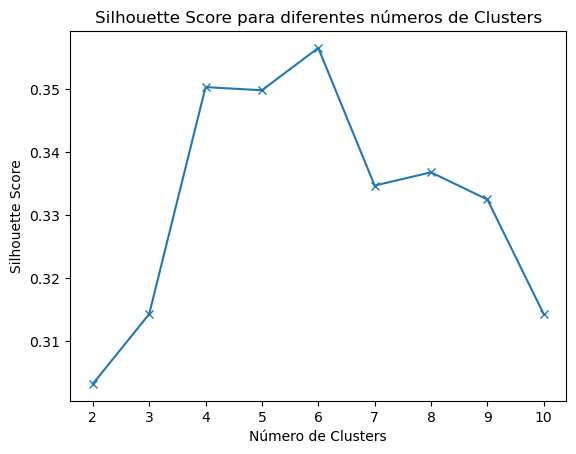

In [19]:
sse = []  

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df)

    score = silhouette_score(df, labels)
    sse.append(score)

plt.plot(range(2, 11), sse, marker='x')
plt.xlabel('N√∫mero de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes n√∫meros de Clusters')
plt.show()


No gr√°fico do Silhouette Score podemos identificar que at√© 6 clusters a qualidade da segmenta√ß√£o melhora.  
O pico em 6 clusters sugere que essa pode ser a melhor escolha para garantir uma segmenta√ß√£o mais clara e bem definida.

**Vamos aplicar o Metodo Elbow para validar, ou n√£o, a sugest√£o.**

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=

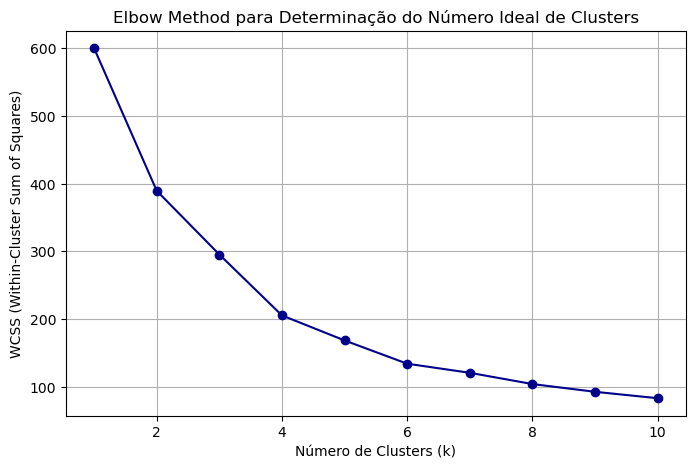

In [20]:
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, '-o', color='darkblue')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method para Determina√ß√£o do N√∫mero Ideal de Clusters')
plt.grid()
plt.show()


Segundo o gr√°fico do Elbow Method, o melhor n√∫mero de clusters parece ser 4, pois √© onde ocorre a "dobra" significativa da curva.  
Ap√≥s esse ponto, a redu√ß√£o da variabilidade dentro dos clusters se torna menos expressiva, indicando que adicionar mais clusters pode n√£o melhorar significativamente a segmenta√ß√£o.

**Compara√ß√£o com o Silhouette Score:**  
O Silhouette Score sugeria 6 clusters, mas o m√©todo Elbow aponta 4 clusters como uma op√ß√£o mais equilibrada.  

**Vamos testar ambos os valores (K=4 e K=6) e avaliar qualitativamente qual faz mais sentido para a segmenta√ß√£o dos clientes.**

In [21]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
centroids_4 = kmeans_4.cluster_centers_

df_centroids_4 = pd.DataFrame(centroids_4, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

fig_4 = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                   color=df['Cluster_4'].astype(str), 
                   title="Segmenta√ß√£o dos Clientes com K=4 Clusters")

fig_4.add_scatter(x=df_centroids_4['Annual Income (k$)'], y=df_centroids_4['Spending Score (1-100)'], 
                  mode='markers', marker=dict(size=12, color='black', symbol='x'), name="Centroides")
fig_4.show()

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



A segmenta√ß√£o com K=4 mostra clusters bem definidos, indicando padr√µes claros de agrupamento.  
Observamos uma distribui√ß√£o distinta dos grupos, onde alguns est√£o mais concentrados, enquanto outros apresentam maior dispers√£o. Em especial, os clusters 2 e 0 com maior variabilidade, sugerindo que podem incluir clientes com comportamentos distintos dentro de suas respectivas categorias.

In [22]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
df['Cluster_6'] = kmeans_6.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
centroids_6 = kmeans_6.cluster_centers_

df_centroids_6 = pd.DataFrame(centroids_6, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

fig_6 = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                   color=df['Cluster_6'].astype(str), 
                   title="Segmenta√ß√£o dos Clientes com K=6 Clusters")

fig_6.add_scatter(x=df_centroids_6['Annual Income (k$)'], y=df_centroids_6['Spending Score (1-100)'], 
                  mode='markers', marker=dict(size=12, color='black', symbol='x'), name="Centroides")
fig_6.show()

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



A segmenta√ß√£o com K=6 apresenta uma divis√£o mais detalhada dos clientes, identificando grupos com padr√µes distintos de comportamento.  
Os clusters est√£o bem definidos, mas alguns grupos, como os clusters 2 e 4, mostram maior dispers√£o, indicando clientes com caracter√≠sticas mais variadas dentro desses segmentos.   
A presen√ßa dos centroides refor√ßa a separa√ß√£o entre os agrupamentos, sugerindo que K=6 pode capturar nuances mais refinadas na segmenta√ß√£o.

**Silhouette Score**

In [23]:
score_4 = silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster_4'])
score_6 = silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster_6'])

print(f"Silhouette Score para K=4: {score_4:.4f}")
print(f"Silhouette Score para K=6: {score_6:.4f}")

Silhouette Score para K=4: 0.4040
Silhouette Score para K=6: 0.4284


O Silhouette Score indica a qualidade da separa√ß√£o dos clusters, sendo um fator essencial na escolha do n√∫mero ideal de agrupamentos.

O valor de 0.4311 para K=6 sugere que os clusters est√£o razoavelmente bem definidos, com uma separa√ß√£o mais clara entre os grupos.  
J√° o score de 0.4040 para K=4 mostra uma segmenta√ß√£o coerente, mas com um leve aumento na sobreposi√ß√£o entre alguns clusters.  

A diferen√ßa entre os valores n√£o √© extrema, mas refor√ßa a ideia de que K=6 pode capturar padr√µes mais refinados na segmenta√ß√£o, permitindo uma melhor discrimina√ß√£o entre grupos com caracter√≠sticas distintas.


In [24]:
df.drop(columns=['Cluster_4'], inplace=True)

In [25]:
df.rename(columns={'Cluster_6': 'Clusters'}, inplace=True)

Invertendo a padroniza√ß√£o para visualizar os clusters com os dados originais 

In [26]:
df[padronizar_col] = scaler.inverse_transform(df[padronizar_col])
df.head()

Gender   Age  Annual Income (k$)  Spending Score (1-100)  Clusters
0       0  19.0                15.0                    39.0         0
1       0  21.0                15.0                    81.0         0
2       1  20.0                16.0                     6.0         5
3       1  23.0                16.0                    77.0         0
4       1  31.0                17.0                    40.0         5

# Visualiza√ß√µes finais

c:\Users\Ana Paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ana Paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ana Paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ana Paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



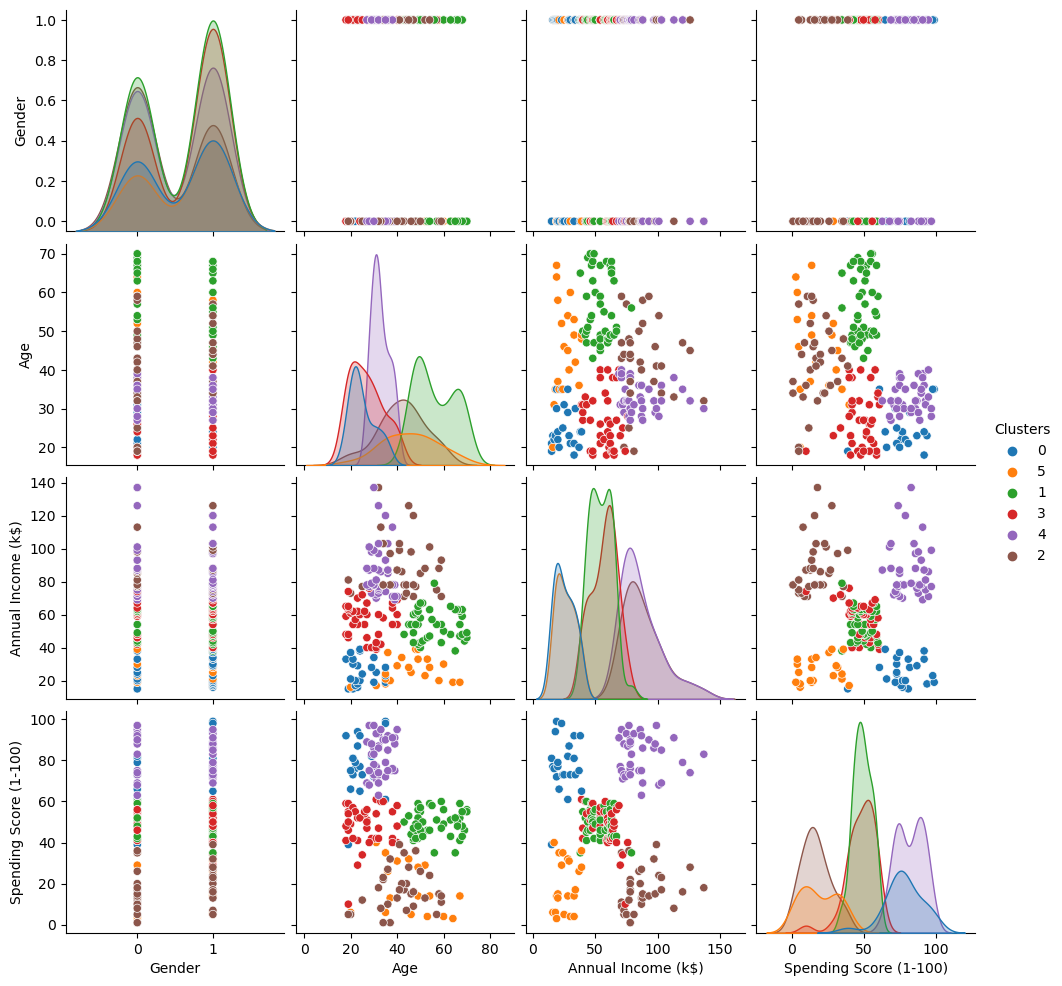

In [27]:
df['Clusters'] = kmeans_6.labels_.astype('str')
sns.pairplot(df, hue='Clusters')

A an√°lise dos clusters revela padr√µes claros na segmenta√ß√£o dos clientes. Observamos que diferentes combina√ß√µes de vari√°veis favorecem o agrupamento de certos perfis, destacando tend√™ncias de comportamento.  
A rela√ß√£o entre idade e renda se mostra influente, indicando que faixas et√°rias distintas possuem padr√µes de consumo espec√≠ficos.  
Al√©m disso, o Spending Score varia significativamente entre os grupos, evidenciando perfis de compra diversificados e oportunidades para estrat√©gias personalizadas. 


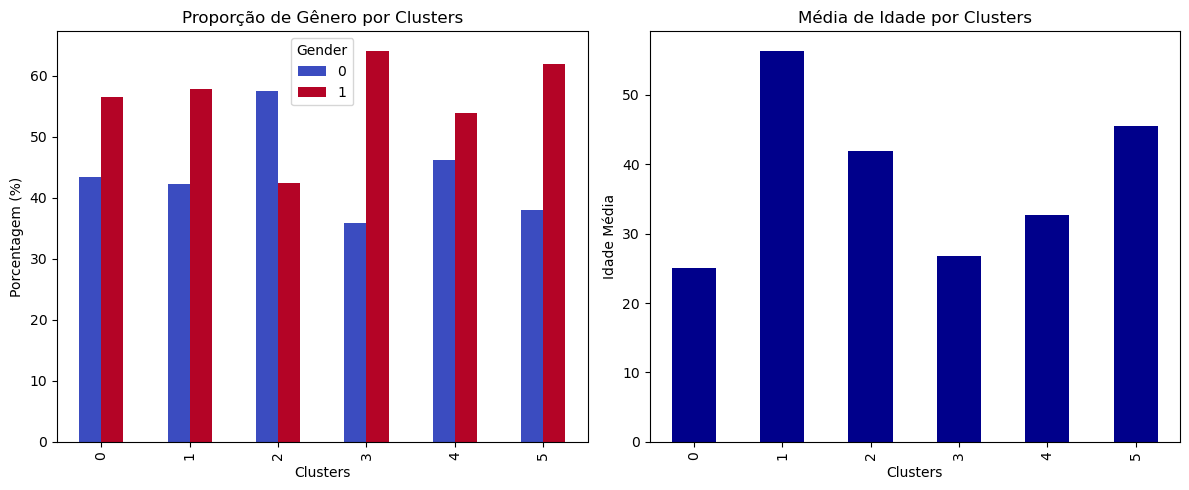

In [29]:
proporcao_genero = df.groupby('Clusters')['Gender'].value_counts(normalize=True).unstack() * 100
media_idade = df.groupby('Clusters')['Age'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12,5))

proporcao_genero.plot(kind='bar', ax=ax[0], colormap='coolwarm')
ax[0].set_title("Propor√ß√£o de G√™nero por Clusters")
ax[0].set_ylabel("Porcentagem (%)")

media_idade.plot(kind='bar', ax=ax[1], color='darkblue')
ax[1].set_title("M√©dia de Idade por Clusters")
ax[1].set_ylabel("Idade M√©dia")

plt.tight_layout()
plt.show()

Os gr√°ficos revelam insights importantes sobre a distribui√ß√£o demogr√°fica dos clusters. 

- Propor√ß√£o de G√™nero por Clusters ‚Üí Alguns grupos apresentam uma predomin√¢ncia clara de um dos g√™neros, sugerindo que certos perfis de consumo podem estar mais associados a um p√∫blico espec√≠fico.  

- M√©dia de Idade por Clusters ‚Üí A idade m√©dia varia significativamente entre os clusters, com alguns grupos concentrando clientes mais jovens e outros refletindo um perfil mais maduro, o que pode influenciar padr√µes de compra e prefer√™ncias de consumo.


# **Aplica√ß√µes Comerciais e Estrat√©gias de Segmenta√ß√£o**  

A an√°lise dos clusters revelou padr√µes distintos de comportamento entre os clientes, permitindo uma segmenta√ß√£o mais eficiente e aplic√°vel em estrat√©gias comerciais.  

## **1Ô∏è‚É£ Perfis de Clientes e Estrat√©gias de Marketing**  

Cada cluster representa um perfil espec√≠fico de consumidor, possibilitando **personaliza√ß√£o de ofertas**, campanhas direcionadas e otimiza√ß√£o da experi√™ncia do cliente.  

- **Cluster 0 ‚Äì Consumidores Econ√¥micos** üí∞  
  üìå Foco em **pre√ßos acess√≠veis**, descontos e fideliza√ß√£o para maximizar o engajamento.  
  üìå Programas de **cashback** e cupons promocionais incentivam compras recorrentes.  

- **Cluster 1 ‚Äì Jovens Impulsivos** üõçÔ∏è  
  üìå Estrat√©gias de **marketing digital** e campanhas baseadas em tend√™ncias.  
  üìå **Gamifica√ß√£o e experi√™ncias exclusivas** podem aumentar a reten√ß√£o.  

- **Cluster 2 ‚Äì Clientes Tradicionais** üè°  
  üìå Foco na **credibilidade e qualidade do produto**.  
  üìå **Recomenda√ß√µes personalizadas** e atendimento pr√≥ximo refor√ßam a rela√ß√£o com a marca.  

- **Cluster 3 ‚Äì Consumidores Premium** üîù  
  üìå Ofertas **exclusivas e personalizadas** para esse p√∫blico de alto valor.  
  üìå **Eventos privados e programas VIP** aumentam a percep√ß√£o de exclusividade.  

- **Cluster 4 ‚Äì Clientes Conservadores** üõë  
  üìå Estrat√©gias focadas em **confian√ßa e atendimento diferenciado**.  
  üìå **Produtos essenciais e benef√≠cios** destacam a solidez da marca.  

- **Cluster 5 ‚Äì Compradores Vari√°veis** üîÑ  
  üìå Campanhas adapt√°veis com **promo√ß√µes sazonais e estrat√©gias de reten√ß√£o**.  
  üìå **Automa√ß√£o de marketing** para detectar per√≠odos de alta e baixa atividade.  


## **2Ô∏è‚É£ Otimiza√ß√£o de Investimentos em Marketing**  

üìä **Segmenta√ß√£o eficiente** permite **reduzir custos com campanhas n√£o direcionadas** e aumentar o retorno sobre investimento (**ROI**).  
üìå Estrat√©gias de **publicidade personalizada** maximizam a convers√£o e engajamento.   


## **3Ô∏è‚É£ Aplica√ß√µes em Experi√™ncia do Cliente**  

üéØ **Personaliza√ß√£o no atendimento** e programas de fidelidade baseados no perfil do cliente.  
üîç **Intelig√™ncia de dados** para prever comportamentos de consumo e adaptar ofertas.  
üöÄ **Expans√£o de estrat√©gias digitais**, conectando os clusters √†s prefer√™ncias de compra online. 